<a href="https://colab.research.google.com/github/Rishabh690/Animal-Classification/blob/main/Animal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2 as cv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! unzip "/content/drive/MyDrive/Datasets/Animal Image Dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: animals/animals/bison/73b10839bc.jpg  
  inflating: animals/animals/bison/74dc1dd32a.jpg  
  inflating: animals/animals/bison/75ab166a7d.jpg  
  inflating: animals/animals/bison/79e1610d01.jpg  
  inflating: animals/animals/bison/7ba5eee91f.jpg  
  inflating: animals/animals/bison/7d214aab4b.jpg  
  inflating: animals/animals/bison/7f2ef9ab03.jpg  
  inflating: animals/animals/bison/82ec723a4f.jpg  
  inflating: animals/animals/bison/85e145af6c.jpg  
  inflating: animals/animals/bison/862e2c6379.jpg  
  inflating: animals/animals/bison/87a5c700ad.jpg  
  inflating: animals/animals/bison/88b723ce90.jpg  
  inflating: animals/animals/bison/8c3af742c3.jpg  
  inflating: animals/animals/bison/8e34044b98.jpg  
  inflating: animals/animals/bison/8e6adbdc40.jpg  
  inflating: animals/animals/bison/8fce80d5ba.jpg  
  inflating: animals/animals/bison/961a895686.jpg  
  inflating: animals/animals/bison/984a5b583d.jpg  
  inflating: 

In [4]:
import os
animal_categories=print(len(os.listdir("/content/animals/animals")))
animal_categories

90


In [5]:
# import os
animal_categories=print(os.listdir("/content/animals/animals"))
animal_categories

['mosquito', 'eagle', 'wolf', 'chimpanzee', 'cockroach', 'reindeer', 'hummingbird', 'turtle', 'pigeon', 'crab', 'starfish', 'hornbill', 'zebra', 'sparrow', 'badger', 'squid', 'crow', 'hare', 'possum', 'squirrel', 'fly', 'orangutan', 'tiger', 'bison', 'leopard', 'dragonfly', 'pelecaniformes', 'kangaroo', 'hippopotamus', 'sheep', 'lobster', 'ox', 'cow', 'ladybugs', 'deer', 'rat', 'hyena', 'shark', 'hamster', 'turkey', 'porcupine', 'moth', 'grasshopper', 'beetle', 'coyote', 'panda', 'donkey', 'okapi', 'bat', 'dolphin', 'duck', 'snake', 'lizard', 'boar', 'parrot', 'sandpiper', 'koala', 'owl', 'bear', 'goldfish', 'raccoon', 'horse', 'seahorse', 'bee', 'lion', 'whale', 'cat', 'antelope', 'swan', 'penguin', 'mouse', 'woodpecker', 'rhinoceros', 'gorilla', 'butterfly', 'wombat', 'flamingo', 'seal', 'oyster', 'goat', 'hedgehog', 'fox', 'caterpillar', 'pig', 'elephant', 'goose', 'otter', 'octopus', 'dog', 'jellyfish']


In [6]:
def read_image(path, images, labels, filenames):
    
    for root, dirs, files in os.walk(path):

        for name in dirs:
            
            direct = os.path.join(path, name)
            
            for filename in os.listdir(direct):
                
                img = cv.imread(os.path.join(path + "/" + name, filename))
                labels.append(name)
                img = cv.resize(img, Image_Size)
                images.append(img)
                filenames.append(name + '/' + filename)

In [7]:
# Declaring image size

Image_Size = (224,224)

In [8]:
# Reading images from the storage

path = '/content/animals/animals/'
labels = []
filenames = []
images = []


read_image(path=path, images=images, labels=labels, filenames=filenames)
print("Number of images:", len(images))

Number of images: 5400


In [9]:
# Making df from the images read
df = pd.DataFrame({        
    'filename' : filenames,
    'category' : labels
    })
del labels 
del filenames

In [10]:
df.head()

,filename,category
0,mosquito/56af56310b.jpg,mosquito
1,mosquito/0ce2e70635.jpg,mosquito
2,mosquito/3f4fa62092.jpg,mosquito
3,mosquito/6d5d5a4371.jpg,mosquito
4,mosquito/2c8600c6ad.jpg,mosquito


Image shape: (630, 1200, 3)


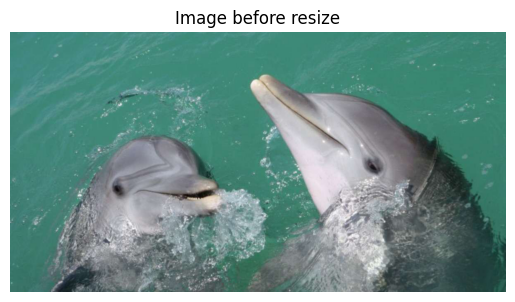

In [11]:
img = mpimg.imread("/content/animals/animals/dolphin/21f87d8de0.jpg")
plt.imshow(img)
print(f"Image shape: {img.shape}")
plt.title("Image before resize")
plt.axis("off")
plt.show()

image after resizing
(224, 224, 3)


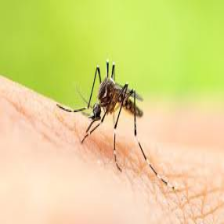

In [12]:
from google.colab.patches import cv2_imshow
image_index = 0  # Index of the image you want to display
image = images[image_index]
print("image after resizing")
print(image.shape)
cv2_imshow(image)


In [13]:
import random
def view_image(file_dir,file_class):
  file_folder=file_dir+file_class
  random_image=random.sample(os.listdir(file_folder),1)
  img = mpimg.imread(file_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(file_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img  

Image shape: (549, 732, 3)


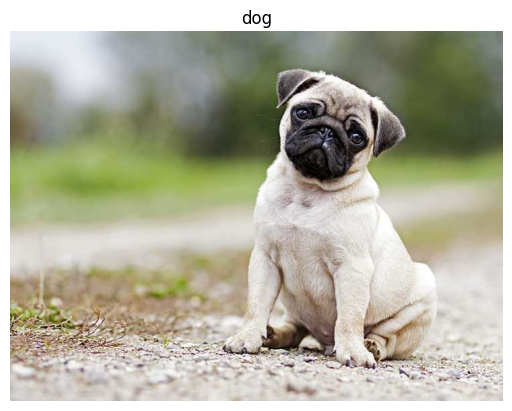

In [14]:
img = view_image(file_dir='/content/animals/animals/',
                 file_class="dog")
imgplot = plt.imshow(img)

Image shape: (183, 275, 3)
Image shape: (500, 500, 3)
Image shape: (512, 1024, 3)


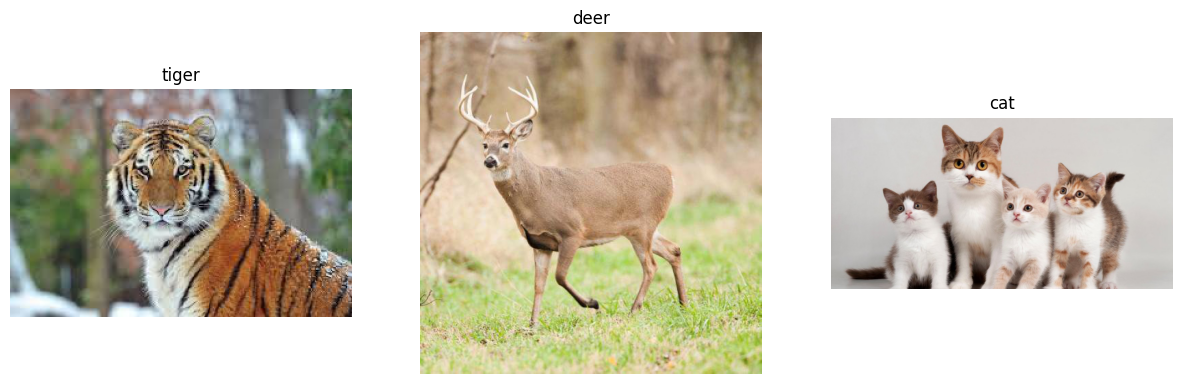

In [15]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_image("/content/animals/animals/", "tiger")
plt.subplot(1,3,2)
pizza_image = view_image("/content/animals/animals/", "deer")
plt.subplot(1,3,3)
pizza_image = view_image("/content/animals/animals/", "cat")

In [16]:
# x=df["filename"]
# y=df["category"]

In [17]:
from sklearn.model_selection import train_test_split
train,val=train_test_split(df,test_size=0.30)

In [18]:
# Create an instance of the ImageDataGenerator with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    preprocessing_function=lambda image: tf.image.resize(image, Image_Size)
)

# Apply data augmentation to your training data
augmented_images = datagen.flow_from_dataframe(
                            dataframe=train, directory=path,
                            x_col='filename',
                            y_col='category',
                            target_size=Image_Size
)

test_gen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=lambda image: tf.image.resize(image, (224, 224))
)
test_images = test_gen.flow_from_dataframe(
        dataframe=val,
        directory=path,
        x_col='filename',
        y_col='category',
        target_size=Image_Size
)

Found 3780 validated image filenames belonging to 90 classes.
Found 1620 validated image filenames belonging to 90 classes.


Found 1 validated image filenames belonging to 1 classes.


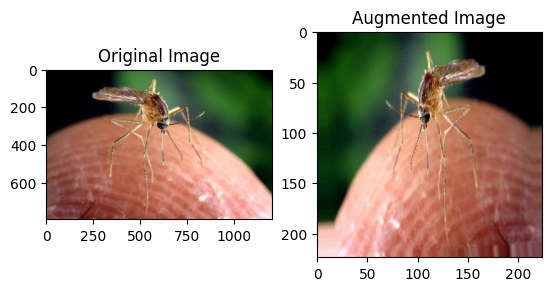

In [36]:
import matplotlib.pyplot as plt

# Choose an index to select an image from the DataFrame
index = 50

# Get the filename of the image from the DataFrame
image_filename = df.iloc[index]['filename']

# Load and display the original image
original_image = plt.imread(path+image_filename)
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")

# Generate the augmented image using the ImageDataGenerator
augmented_images = datagen.flow_from_dataframe(
    dataframe=df.iloc[[index]],
    directory=path,
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    batch_size=1
)
augmented_image = augmented_images.next()[0][0]

# Display the augmented image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title("Augmented Image")

# Show the plots
plt.show()


#Inceptionv3

In [19]:
base_model = tf.keras.applications.InceptionV3(include_top= False,)

87910968/87910968 [==============================] - 0s 0us/step


In [20]:
base_model = tf.keras.applications.InceptionV3(include_top= False,)
# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(300,300,3), name = "input-layer")
#4. Rescaling
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(90, activation = "softmax", name = "output-layer")(x)

# 8. Combine the inputs with outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# # 9. Compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])


history = model_0.fit(augmented_images,
                                 epochs=10,
                                 steps_per_epoch = len(augmented_images),
                                 validation_data = test_images,
                                 validation_steps = int(0.25*len(test_images)),)

Shape after passing inputs through base model: (None, 8, 8, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/10
119/119 [==============================] - 125s 937ms/step - loss: 4.5974 - accuracy: 0.5825 - val_loss: 2.7596 - val_accuracy: 0.7344
Epoch 2/10
119/119 [==============================] - 108s 905ms/step - loss: 1.9413 - accuracy: 0.7698 - val_loss: 1.7497 - val_accuracy: 0.7865
Epoch 3/10
119/119 [==============================] - 105s 880ms/step - loss: 1.5240 - accuracy: 0.8209 - val_loss: 2.1061 - val_accuracy: 0.7891
Epoch 4/10
119/119 [==============================] - 109s 919ms/step - loss: 1.4235 - accuracy: 0.8447 - val_loss: 2.9514 - val_accuracy: 0.7734
Epoch 5/10
119/119 [==============================] - 106s 892ms/step - loss: 1.5238 - accuracy: 0.8590 - val_loss: 1.8821 - val_accuracy: 0.8307
Epoch 6/10
119/119 [==============================] - 106s 889ms/step - loss: 0.9838 - accuracy: 0.8915 - val_loss: 1.6694 - val_accuracy: 0.8672
Epoch 7/1

In [22]:
  def plot_loss_curves(history):
      loss = history.history["loss"]
      val_loss = history.history["val_loss"]

      accuracy = history.history["accuracy"]
      val_accuracy = history.history["val_accuracy"]

      epochs = range(len(history.history["loss"]))

      #plot loss
      plt.plot(epochs, loss, label = "training_loss")
      plt.plot(epochs, val_loss, label = "val_loss")
      plt.title("loss")
      plt.xlabel("epochs")
      plt.legend()

      #plot accuracy
      plt.figure() 
      plt.plot(epochs, accuracy, label = "training_accuracy")
      plt.plot(epochs, val_accuracy, label = "val_accuracy")
      plt.title("accuracy")

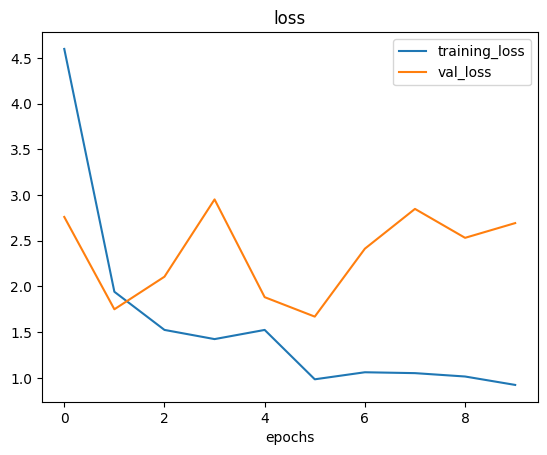

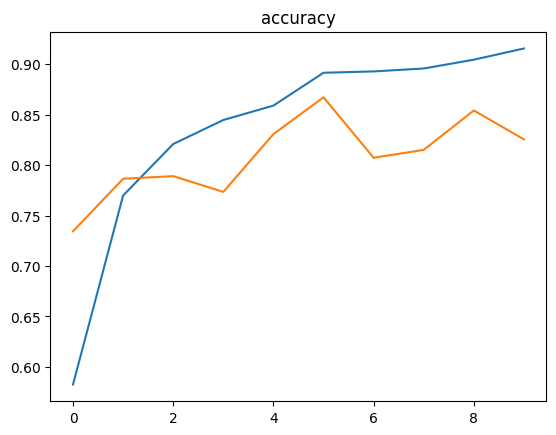

In [23]:
plot_loss_curves(history)